#  Insurance Cost Prediction and Lifestyle: A case of Smokers vs. Non Smokers

In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.groupby('smoker').size() # Number of ssmokers to non smokers

smoker
no     1064
yes     274
dtype: int64

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from statsmodels.formula.api import ols

In [7]:
fit = ols('charges ~ age + children + bmi  + C(smoker)', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:49:09   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
C(smoker)[T.yes]  2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
age                257.8495     11.896     21.675      0.000     234.512     281.187
children           473.5023    137.792      3.436      0.001     203.190     743.814
bmi                321.8514     27.378     11.756      0.000     268.143     375.559
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Replacing string values to numbers
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [10]:
# features
X = df[['age', 'sex', 'bmi', 'children','smoker','region']]
# predicted variable
y = df['charges']

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:

#Create correlation dataframe
df1Cor = df.corr()
df1Cor.head()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251


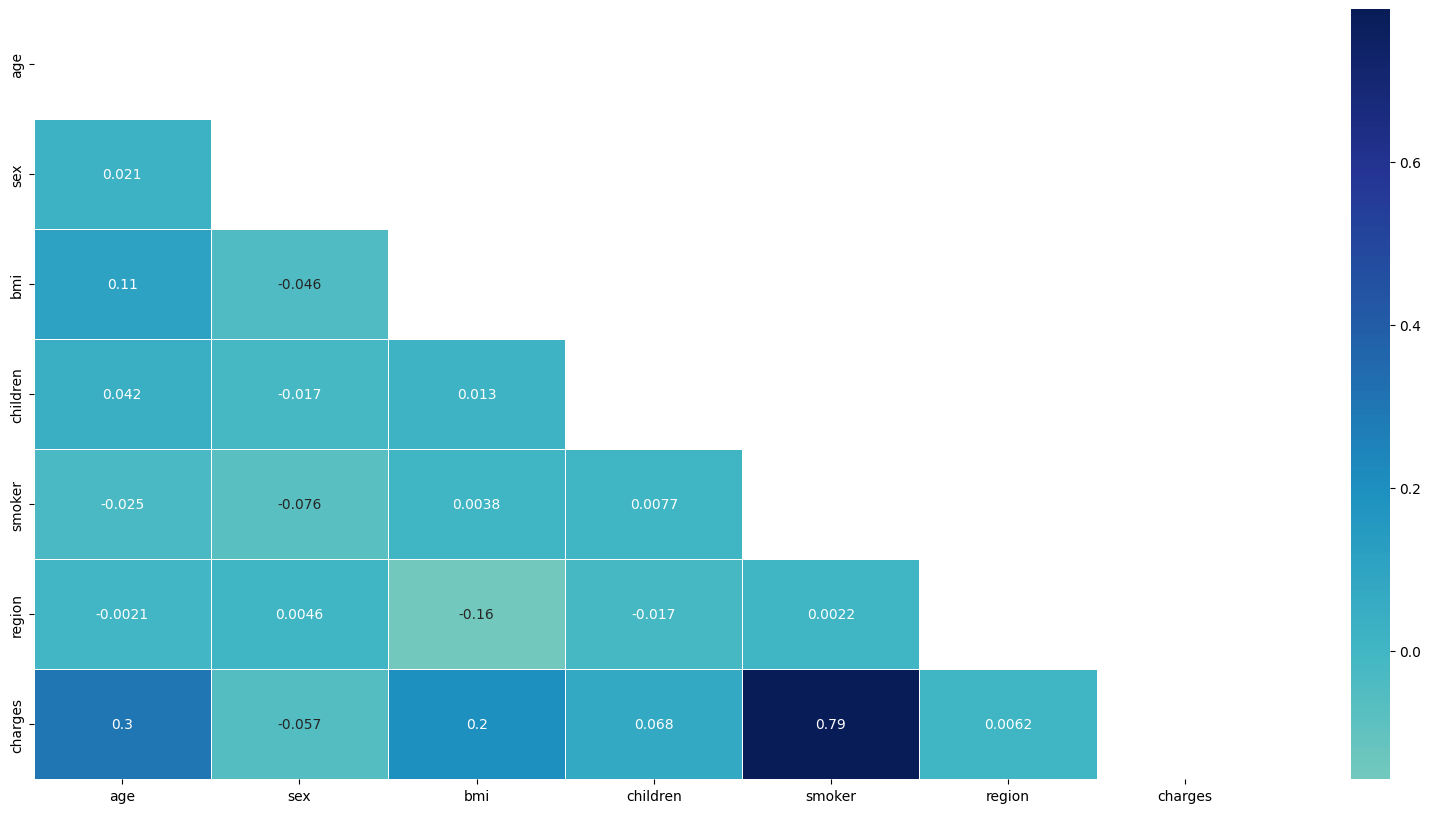

In [13]:
#Plot correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df1Cor, dtype=bool))
sns.heatmap(df1Cor, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

In [14]:
# features
X = df[['age', 'sex', 'bmi', 'children','smoker','region']]
# predicted variable
y = df['charges']

In [15]:
# importing train_test_split model
from sklearn.model_selection import train_test_split
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:

print('length X_test:', len(X_test),'length X_train:',len(X_train))

length X_test: 402 length X_train: 936


In [17]:
# importing the model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
#

In [18]:
#Fit linear model by passing training dataset
model1.fit(X_train,y_train)

LinearRegression()

In [19]:
r_sq = model1.score(X_test, y_test)
print('R-squared:', r_sq)

R-squared: 0.7714283296692224


In [20]:
# Predicting the target variable for test datset
predictions = model1.predict(X_test)

In [21]:
#Get RMSE
mean_squared_error(predictions, y_test, squared=False)

5884.3325719079685

In [22]:
predictions[0:5]

array([ 4680.92132578,  5996.99661387,  7780.14951205, 37346.44872269,
       32357.32641544])

In [23]:
# Predict charges for new customer : Name- Ronaldo
data = {'age' : 36,
        'sex' : 0,
        'bmi' : 33.50,
        'children' : 6,
        'smoker' : 1,
        'region' : 3}
index = [1]
Ronaldo_df = pd.DataFrame(data,index)
Ronaldo_df

,age,sex,bmi,children,smoker,region
1,36,0,33.5,6,1,3


In [24]:
prediction_Ronaldo = model1.predict(Ronaldo_df)
print("Medical Insurance cost for Ronaldo is : ",prediction_Ronaldo)

Medical Insurance cost for Ronaldo is :  [35181.16467912]


In [25]:
# Predict charges for new customer : Name- Serena
data2 = {'age' : 33,
        'sex' : 1,
        'bmi' : 30.50,
        'children' : 2,
        'smoker' : 0,
        'region' : 3}
index = [1]
serena_df = pd.DataFrame(data2,index)
serena_df

,age,sex,bmi,children,smoker,region
1,33,1,30.5,2,0,3


In [26]:
prediction_Serena = model1.predict(serena_df)
print("Medical Insurance cost for Serena is : ",prediction_Serena)

Medical Insurance cost for Serena is :  [7550.20258596]
